# ANALYSIS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from gensim.summarization import keywords
from gensim.summarization import summarize
import pandas as pd
from collections import Counter

from analysis import *
from cluster_analysis import *
from dimension_reduction import *
from plotting import *
from result_print import *
from outlier_detection import *
from topic_modeling import *
from utils import save_pickle_file, load_pickle_file
from constants import PROCESSED_DATA_PATH, BOW_MODEL_PATH

In [3]:
MAX_DISTANCE = 30
OUTLIER_DETECTION_TRESHOLD = 1.4826*3
N_TOPICS = 20

## Load data

In [4]:
model_data = load_pickle_file(BOW_MODEL_PATH)
X = model_data['X']
model = model_data['model']
tdidf_vectorizer = model_data['tdidf_vectorizer']

In [5]:
processed_data = load_pickle_file(PROCESSED_DATA_PATH)
job_summary_list = processed_data['job_summary_list']
documents = processed_data['documents']
lemmas = processed_data['lemmas']
df_data = processed_data['df_processed']


## Analysis

### Cluster analysis

Cluster 1
Job ads: 60
Senior Python Developer | Pearson Frank | Tampere
Senior Python in - house Developer - Helsinki | Pearson Frank | Helsinki
Data Scientist / Hadoop Architect | Bittium Corporation | Espoo
Senior Python Developer - Helsinki | Pearson Frank | Helsinki
Tohtorikoulutettava (Doctoral Candidate Position in Artifici... | Aalto-yliopisto | Espoo
...

Cluster 2
Job ads: 357
Testausautomaation ja RPA:n asiantuntija | Raha-Automaattiyhdistys (Ray) | Helsinki
Junior RPA Developer | Tieto Corporation | Helsinki
Web-suunnittelija | Buutti Oy | Oulu
Ohjelmistokehittäjiä Helsinkiin, Tampereelle ja Turkuun | Vincit | Helsinki
Ohjelmistokehittäjiä | Vincit | Helsinki
...

Cluster 3
Job ads: 71
Python-kehittäjä koodariklaaniimme | Rekrytointitalli Oy | Helsinki
Koodaava Sysadmin / IT-tuki, PHZ Full Stack Oy | Rekrytointitalli Oy | Helsinki
DevOps Cloud Platform Developer, PHZ Full Stack Oy | Rekrytointitalli Oy | Helsinki
Koodaava Sysadmin / IT-tuki | Rekrytointitalli Oy | Helsinki
K

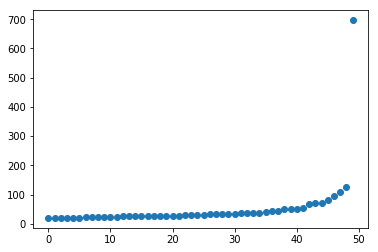

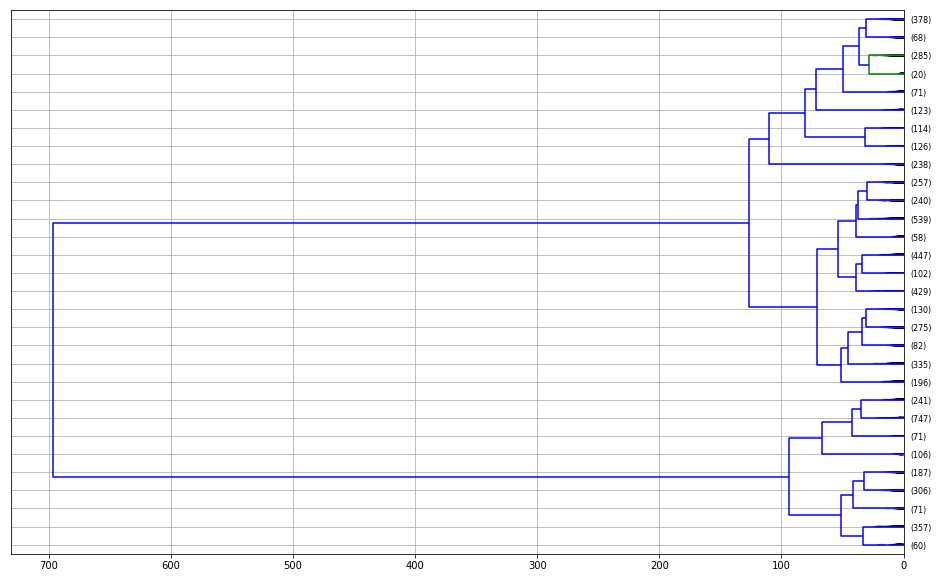

In [6]:
cluster_data = cluster_analysis(X, MAX_DISTANCE)
linkage_matrix = cluster_data['linkage_matrix']
similarities = cluster_data['similarities']
clusters = cluster_data['clusters']

display_clustering_results(linkage_matrix, clusters, job_summary_list, MAX_DISTANCE)

In [7]:
k = calculate_optimal_number_of_clusters(linkage_matrix)
k

2

### Most similar documents

In [8]:
document_index = 50
top_indices, top_similarities = calculate_most_similar_documents(document_index, similarities, 15)
display_most_similar_documents(document_index, top_indices, top_similarities, job_summary_list)

Reference document:  5G Integration engineer | NOKIA | Oulu
Most similar documents:
[('5G Integration engineer | NOKIA | Oulu', 1.0),
 ('Engineer, Integration | NOKIA | Oulu', 0.9059183462729917),
 ('5G Engineer, Integration | NOKIA | Oulu', 0.9059183462729917),
 ('5G RF Integration | NOKIA | Oulu', 0.7878217220569228),
 ('Integrator 5G RF | NOKIA | Oulu', 0.7878217220569228),
 ('Engineer 5G RF Integration | NOKIA | Oulu', 0.7878217220569228),
 ('Technical Lead 5G RF Integration | NOKIA | Oulu', 0.7878217220569228),
 ('Engineer Software | NOKIA | Oulu', 0.65863372196389),
 ('Thesis Worker, Productization Oulu | NOKIA | Oulu', 0.4721563990702521),
 ('Trainee, Productization | NOKIA | Oulu', 0.36003425729514027),
 ('SW Engineer, Platform Integration | NOKIA | Oulu', 0.335441056164457),
 ('Software Engineer (Drivers & Verification) | u-blox Espoo Oy | Tampere',
  0.32429269940703537),
 ('Build/Test Engineer (AWR in Finland) | National instrument | Espoo',
  0.31873111301104445),
 ('Test A

In [9]:
document_index = 0
top_indices, top_similarities = calculate_most_similar_documents(document_index, similarities, 15)
display_most_similar_documents(document_index, top_indices, top_similarities, job_summary_list)

Reference document:  Testausautomaation ja RPA:n asiantuntija | Veikkaus Oy | Helsinki
Most similar documents:
[('Testausautomaation ja RPA:n asiantuntija | Veikkaus Oy | Helsinki', 1.0),
 ('Testausautomaation ja RPA:n asiantuntija | Raha-Automaattiyhdistys (Ray) | '
  'Helsinki',
  0.8546352776634591),
 ('DevOps- asiantuntija | Veikkaus Oy | Helsinki', 0.7716278409369035),
 ('Hankintapäällikkö | Veikkaus Oy | Helsinki', 0.43469950778256405),
 ('Ohjelmistokehittäjä | Veikkaus Oy | Helsinki', 0.4342633160968282),
 ('Pelijärjestelmä\xadkehittäjä | Veikkaus Oy | Helsinki', 0.42869660425206724),
 ('Pelijärjestelmä\xadkehittäjiä | Veikkaus Oy | Helsinki',
  0.42869660425206724),
 ('Pelijärjestelmäkehittäjä | Veikkaus Oy | Helsinki', 0.42445656565558854),
 ('WEB-analyytikko | Veikkaus Oy | Helsinki', 0.41773035087434496),
 ('Ohjelmistokehittäjä (Senior) | Veikkaus Oy | Helsinki', 0.3897131217563443),
 ('Big Data - kehittäjä | Veikkaus Oy | Helsinki', 0.38092646116158113),
 ('Datan ja raporto

### PCA

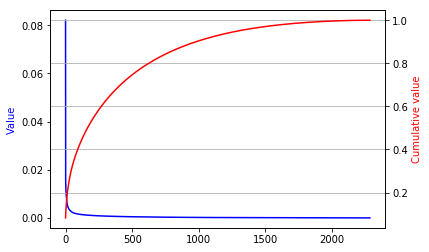

In [10]:
pcs, pca_model = calculate_principal_components(X)
plot_value_and_cumulative_value(pca_model.explained_variance_ratio_)

### MDS

In [11]:
## Works but takes lot of time
# distances = 1 - similarities
# x,y = calculate_mds_vectors(distances)
# plot_mds(x,y, clusters, job_summary_list)

### Outlier detection

In [12]:
rng = np.random.RandomState(42)
clf = IsolationForest(random_state=rng)
clf.fit(X)
scores = clf.decision_function(X)

/home/ossi/Repos/Personal/job_advertisement_analysis/venv/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/ossi/Repos/Personal/job_advertisement_analysis/venv/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Number of outliers detected: 22 (0.33 %)
Outliers:
Insurance Professional, Helsinki | Nordea | Helsinki
Junior Cloud Engineer | aTalent FI | Helsinki
Backend Engineer | Wolt | Helsinki
Backend Software Developer | Smartly | Helsinki
Credit Analyst, Helsinki | Nordea | Helsinki
Backend Developers | Accenture | Helsinki
Frontend / Fullstack Developer | Smartly | Helsinki
Sales Manager | Insider | Helsinki
IT Service Manager, Helsinki | Nordea | Helsinki
Financial Controller, Nordea Henkivakuutus Suomi, Helsinki | Nordea | Helsinki
Front-End Developer, Nordea Life, Helsinki | Nordea | Helsinki
Office (Finance & HR) Administrator | Digital Workforce | Helsinki
Summer trainee in Tampere SW R&D | NOKIA | Tampere
Senior/Lead Solution Engineer | Salesforce | Espoo
Salesforce.com Consultants | Accenture | Helsinki
Director of Project Management | ICEYE | Espoo
Summer trainee in Helsinki SW R&D | NOKIA | Helsinki
Product Owner, Helsinki | Nordea | Helsinki
Junior SAS -Developers | Accenture | He

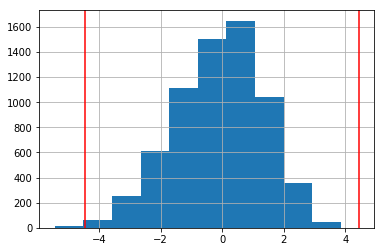

In [13]:
outlier_detection(scores, OUTLIER_DETECTION_TRESHOLD, job_summary_list)

### Keyword extraction, summarization, tagging

In [14]:
document_index = 1
test_document = documents[document_index]
test_lemmas = lemmas[document_index]
print(test_document, '\n')

We are looking for Insurance Professional´s. You will meet our customers’ changing needs and offer them the best possible service.

In today’s world, change is the one thing you can count on. But whatever the future brings, our customers remain at the heart of everything we do.

That’s where you come in. Working with dedicated colleagues in an exciting, fast-paced environment, you’ll help meet our customers’ changing needs.

We aim to be courageous and explorative in our approach to innovating better ways of delivering banking services – anytime, anywhere. This means you’ll have many opportunities to learn and grow as you build your career with us. Will you help us lead the way in creating great customer experiences?

Your future responsibilities
You will join Nordea Life´s Customer Services unit. Nordea Life is a subsidiary to Nordea. We offer life insurance solutions to private and corporate customers. Our mission is to integrate our products with those of Nordea bank and make life i

In [15]:
keywords = keywords(' '.join(test_lemmas), ratio=0.05)
print(f'Keywords:\n{keywords}')

Keywords:
customer
position
positive
nordea
great
service
way
offer
job
learn
learning


In [16]:
summary = summarize(test_document, split=True, ratio = 0.1)
for s in summary: print(s + '\n')

You will meet our customers’ changing needs and offer them the best possible service.

Working with dedicated colleagues in an exciting, fast-paced environment, you’ll help meet our customers’ changing needs.

We offer life insurance solutions to private and corporate customers.

Our mission is to integrate our products with those of Nordea bank and make life insurances more accessible for the customers.

You have experience in customer service / claims handling processes



## Topic modeling

In [17]:
terms = tdidf_vectorizer.get_feature_names()

### LDA

In [18]:
model = LatentDirichletAllocation(n_components=20, 
                                  max_iter=10, 
                                  learning_method='online', 
                                  random_state=100, 
                                  batch_size=128, 
                                  evaluate_every = -1,
                                  n_jobs = -1)
topic_words, document_topics = topic_analysis(model, X, terms, 5, 5)

In [19]:
top_document_topics = [i[0][1] for i in document_topics]
topic_words = [[t[1] for t in i] for i in topic_words]

In [20]:
document_topics[0]

[(0.904332077073673, 4),
 (0.0050351539193724424, 10),
 (0.00503515389742237, 5),
 (0.005035153867223689, 14),
 (0.005035153833076131, 13)]

In [21]:
topic_counts = Counter(top_document_topics)
df_topic_counts = pd.DataFrame.from_dict(dict(topic_counts), orient='index', columns=['n_ads'])
df_topic_words = pd.DataFrame(topic_words)
df_summary = pd.merge(df_topic_words, df_topic_counts, left_index=True, right_index=True)

In [22]:
df_summary

,0,1,2,3,4,n_ads
4,tehtävä,työ,osata,hyvä,asiakas,2095
5,tuleva,oma,vuo,esim,tämä,37
10,team,experience,work,customer,development,4378
13,university,research,aalto,aalto university,professor,149


In [23]:
df_data['main_topic'] = top_document_topics

In [24]:
df_data[df_data['main_topic'] == 0].head()

,id,categories__name,date_published,employer__name,is_active,job_description,job_title__name,location__name,location__population,pages__name,language,job_summary,main_topic


### LSA

In [25]:
model = TruncatedSVD(n_components=N_TOPICS,
                     algorithm='randomized',
                     n_iter=10)
topic_words, document_topics = topic_analysis(model, X, terms, 5, 5)

In [26]:
top_document_topics = [i[0][1] for i in document_topics]
topic_words = [[t[1] for t in i] for i in topic_words]

In [27]:
topic_counts = Counter(top_document_topics)
df_topic_counts = pd.DataFrame.from_dict(dict(topic_counts), orient='index', columns=['n_ads'])
df_topic_words = pd.DataFrame(topic_words)
df_summary = pd.merge(df_topic_words, df_topic_counts, left_index=True, right_index=True)

In [28]:
df_summary

,0,1,2,3,4,n_ads
0,team,experience,work,customer,development,3966
1,tehtävä,työ,osata,hyvä,asiakas,2102
2,university,research,aalto,aalto university,professor,229
3,sale,business,customer,management,marketing,5
4,game,data,gaming,studio,get,85
5,data,game,nokia,status,analytics,104
7,data,academic work,academic,client,hakuprosessi,1
10,php,java,agency,ltd,client,82
13,test,security,client,automation,digital,3
14,sale,client,marketing,test,microsoft,23


In [29]:
df_data['main_topic'] = top_document_topics

In [37]:
df_data[df_data['main_topic'] == 2].head()

,id,categories__name,date_published,employer__name,is_active,job_description,job_title__name,location__name,location__population,pages__name,language,job_summary,main_topic
155,159,"[python, data science]",2018-05-31,Aalto-yliopisto,False,Aalto University is a community of bold thinke...,Postdoctoral Researcher (fixed term) in the ar...,Espoo,280247.0,Indeed,en,Postdoctoral Researcher (fixed term) in the ar...,2
156,160,"[python, data science]",2018-05-31,Aalto University,False,Aalto University is a community of bold thinke...,Postdoctoral Researcher (fixed term) in the ar...,Helsinki,645482.0,Indeed,en,Postdoctoral Researcher (fixed term) in the ar...,2
163,167,python,2018-05-24,Helsingin yliopiston,False,"Helsinki Institute of Life Science, HiLIFE, is...",Computational Biologist / Bioinformatician,Helsinki,645482.0,Indeed,en,Computational Biologist / Bioinformatician | H...,2
264,268,"[data science, artificial intelligence]",2018-05-23,Aalto University,False,We are looking for a postdoctoral researcher w...,Postdoctoral Researcher in machine learning fo...,Helsinki,645482.0,Indeed,en,Postdoctoral Researcher in machine learning fo...,2
268,272,artificial intelligence,2018-05-23,Aalto University,False,"** Application deadline June 30, 2018. Applica...",Postdoctoral Researcher in Computational HCI,Helsinki,645482.0,Indeed,en,Postdoctoral Researcher in Computational HCI |...,2


### Experiment: show text with highlited topics

In [31]:
from nltk import word_tokenize, WordNetLemmatizer
test_document_index = 155

In [32]:
test_document_text = documents[test_document_index]
tokens = word_tokenize(test_document_text)

In [33]:
def find_word_topics(word, df_topic_words):
    return df_topic_words[df_topic_words == word].dropna(thresh=1).index.tolist()

In [34]:
tokens_processed = []
for token in tokens:
    lemma = WordNetLemmatizer().lemmatize(token)
    topic = find_word_topics(lemma, df_topic_words)
    if topic:
        token = f'<font color="red">{token}{topic}</font>'
    tokens_processed.append(token)

In [35]:
text_processed = ' '.join(tokens_processed)

In [36]:
from IPython.core.display import display, HTML
display(HTML(text_processed))

print('Document topics')
test_document_topics = document_topics[test_document_index]
for (weight, topic_index) in test_document_topics:
    words = topic_words[topic_index]
    print(f' Topic {topic_index}: {round(weight,2)} x {words}')

Document topics
 Topic 2: 0.59 x ['university', 'research', 'aalto', 'aalto university', 'professor']
 Topic 0: 0.27 x ['team', 'experience', 'work', 'customer', 'development']
 Topic 14: 0.06 x ['sale', 'client', 'marketing', 'test', 'microsoft']
 Topic 13: 0.06 x ['test', 'security', 'client', 'automation', 'digital']
 Topic 4: 0.04 x ['game', 'data', 'gaming', 'studio', 'get']
